In [348]:
#import user modules
import utils.helper_functions as hfun
import config as cf
import thouless_times as thouless
import spectral_functions as spec_fun
import sff
import adiabatics as agp
import importlib
importlib.reload(hfun)
importlib.reload(cf)
importlib.reload(thouless)
importlib.reload(spec_fun)
importlib.reload(agp)
importlib.reload(sff)

from utils.fit_functions import *
#--- importet in user module
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.markers import MarkerStyle
import os
from utils import exit
from os import sep as kPSep
from os.path import exists

#--- other modules
import numpy as np
import itertools
import seaborn as sns
import pandas as pd
import math
import random
import imageio
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from joblib import Parallel, delayed
import copy
#plt.style.use(['science','ieee','no-latex'])

# get all the colors
import matplotlib.colors as mcolors
from scipy.special import binom
import sympy as sym
from scipy.optimize import curve_fit as fit

print(cf.base_directory)
from cmath import nan


user_settings = getattr(cf.plot_settings, 'settings')

use_derivative = 0
time_dir = cf.base_directory + "timeEvolution%s"%kPSep
int_dir = cf.base_directory + "IntegratedResponseFunction%s"%kPSep
spec_dir = cf.base_directory + ("IntegratedResponseFunction%sDERIVATIVE%s"%(kPSep,kPSep) if use_derivative else "ResponseFunction%s"%kPSep)

../results/Heisenberg/disorder/PBC/


# MAIN TEXT

## FIGURE 1-2 -- THOULESS TIME

### VERSUS g - perturbation strength

[16. 18.]
[16. 18.]


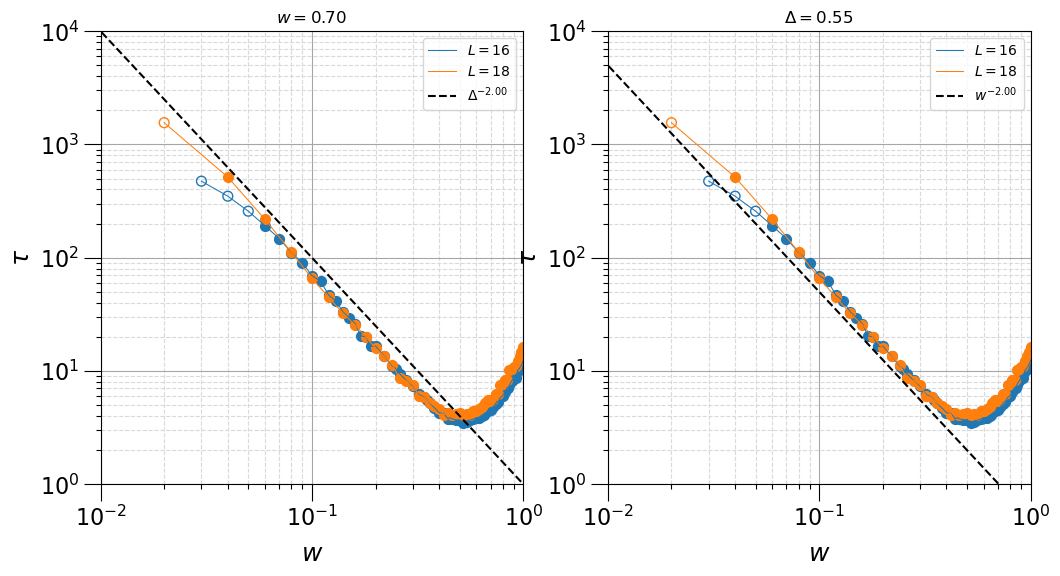

In [349]:
fig, (axis1, axis2) = plt.subplots(nrows=1,ncols=2,figsize=(12,6), dpi = 100)
vals = np.linspace(16,18,2)

new_set_class = copy.deepcopy(cf.plot_settings)
new_set_class.set_vs('w')
settings = getattr(new_set_class, 'settings')

def pretty_plot_why_not(axis, some_param = None):
    axis.set_ylim(1e0, 1e4)
    axis.set_xlim(1e-2, 1e0)
    axis.legend()
    axis.grid(b=True, which='major', color='0.65', linestyle='-')
    axis.grid(b=True, which='minor', color='0.85', linestyle='--')
    axis.set_axisbelow(True)

    
x = np.linspace(0,1,100)
vals, xvals_delta, tau, gap_ratio_delta, c = thouless.plot_taus(axis=axis1, settings = user_settings, vals=vals, fontsize=16, linewidth=0.75, return_data=True)
axis1.title.set_text(r"$w=%.2f$"%cf.params_arr[4])
n = 2.0; axis1.plot(cf.plot_settings.rescale(x, 'x'), (1e0 / (x)**n), ls='--', color='black', label=r"${\Delta}^{-%.2f}$"%(n))
pretty_plot_why_not(axis1)

vals, xvals_w, tau, gap_ratio_w, c = thouless.plot_taus(axis=axis2, settings = settings, vals=vals, fontsize=16, linewidth=0.75, return_data=True)
axis2.title.set_text(r"$\Delta=%.2f$"%cf.params_arr[2])
n = 2.0; axis2.plot(cf.plot_settings.rescale(x, 'x'), (5e-1 / (x)**n), ls='--', color='black', label=r"${w}^{-%.2f}$"%(n))
pretty_plot_why_not(axis2)

### size scaling

[0.5, 0.8]
[0.5, 0.8]


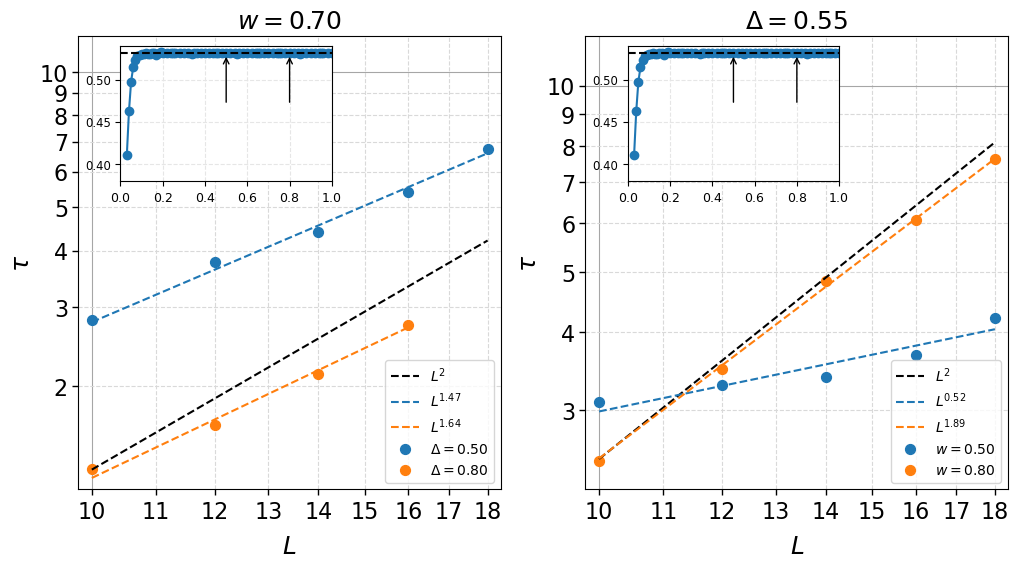

In [350]:
set_class_l = copy.deepcopy(cf.plot_settings)
set_class_l.set_vs('L')
set_class_l.set_scaling('w')

set_class_r = copy.deepcopy(set_class_l)
set_class_l.set_scaling('g')
settings1 = getattr(set_class_l, 'settings')
settings2 = getattr(set_class_r, 'settings')

def add_subplot_axes(ax,rect):
    fig = plt.gcf()
    box = ax.get_position()
    width = box.width
    height = box.height
    inax_position  = ax.transAxes.transform(rect[0:2])
    transFigure = fig.transFigure.inverted()
    infig_position = transFigure.transform(inax_position)    
    x = infig_position[0]
    y = infig_position[1]
    width *= rect[2]
    height *= rect[3]  # <= Typo was here
    #subax = fig.add_axes([x,y,width,height],facecolor=facecolor)  # matplotlib 2.0+
    subax = fig.add_axes([x,y,width,height])
    x_labelsize = subax.get_xticklabels()[0].get_size()
    y_labelsize = subax.get_yticklabels()[0].get_size()
    x_labelsize *= rect[2]**0.15
    y_labelsize *= rect[3]**0.15
    subax.xaxis.set_tick_params(labelsize=x_labelsize)
    subax.yaxis.set_tick_params(labelsize=y_labelsize)
    return subax

fig, (axis1, axis2) = plt.subplots(nrows=1,ncols=2,figsize=(12,6), dpi = 100)

def pretty_plot_why_not(axis, x = None, y = None, colors = None, x_for_r = None, gaps = None, vals = None):
    axis.set_ylim(None, 12)
    #axis.set_xlim(8, 20)
    axis.grid(b=True, which='major', color='0.65', linestyle='-')
    axis.grid(b=True, which='minor', color='0.85', linestyle='--')
    for ax in [axis.xaxis, axis.yaxis]:
        ax.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%d"%x))
        ax.set_minor_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%d"%x))
    axis.tick_params('both', length=4, width=1, which='both')
    axis.set_axisbelow(True)
    exponent = []
    error_bars = []
    if x is not None and y is not None:
        for i in range(len(x)):
            pars, pcov = fit(f=power_law, 
                            xdata=x[i], 
                            ydata=y[i])
            exponent.append(pars[0])
            error_bars.append(np.sqrt(np.diag(pcov)[0]))
            axis.plot(x[i], power_law(x[i], pars[0], pars[1]), linestyle='--', color=c[i], label=r"$L^{%.2f}$"%pars[0])
    
    axis.legend(loc='lower right')
    if x_for_r is not None and gaps is not None:
        left, bottom, width, height = [0.1, 0.68, 0.5, 0.3]
        ax = add_subplot_axes(axis, [left, bottom, width, height])
        ax.plot(x_for_r[0], gaps[0], marker='o')
        ax.set_xlim(0,1);   ax.set_ylim(0.38,0.54)
        ax.axhline(y=0.5307, linestyle='--', color='black')
        ax.grid(b=True, which='major', color='0.9', linestyle='--')
        for i in range(len(x)):
            ax.annotate("", xy=(vals[i], 0.53), xytext=(vals[i], 0.47), arrowprops=dict(arrowstyle="->"))

x = np.linspace(0,1,100)
vals, xvals, tau, gap_ratio, c = thouless.plot_taus(axis=axis1, settings = settings1, vals=[0.5, 0.8], fontsize=16, return_data=True)
axis1.title.set_text(r"$w=%.2f$"%cf.params_arr[4]); axis1.title.set_size(18)
axis1.plot(xvals[0], 0.013*xvals[0]**2, linestyle='--', color='black', label=r"$L^2$")
pretty_plot_why_not(axis = axis1, x=xvals, y=tau, colors=c, x_for_r=xvals_delta, gaps = gap_ratio_delta, vals=vals)

vals, xvals, tau, gap_ratio, c = thouless.plot_taus(axis=axis2, settings = settings2, vals=[0.5, 0.8], fontsize=16, return_data=True)
axis2.title.set_text(r"$\Delta=%.2f$"%cf.params_arr[2]);    axis2.title.set_size(18)
axis2.plot(xvals[0], 0.025*xvals[0]**2, linestyle='--', color='black', label=r"$L^2$")
pretty_plot_why_not(axis = axis2, x=xvals, y=tau, colors=c, x_for_r=xvals_w, gaps = gap_ratio_w, vals=vals)

## FIGURE 3-4 --  SPECTRAL FUNCTIONS

### PLOTTER FUNCTION

In [351]:
def plot_fig3(axis_time, axis_spec, vals = None, settings = None, _site = None, _operator = None):
    #-- set defaults
    if vals is None:        vals = hfun.get_scaling_array()
    if settings is None:    settings = user_settings
    if _site is None:       _site = settings['site']
    if _operator is None:   _operator = settings['operator']
    
    #-- loop over params
    wH = [];            LTA = [];
    wH_typ = [];        val_at_typ = [];
    relax_time = [];    val_at_relax = [];
    for i in range(0, len(vals)):
        x = vals[i]
        status, xdata, ydata, wHnow, wHtypnow = spec_fun.load_spectral(dir=time_dir, 
                                                                    settings=settings, 
                                                                    parameter=x,
                                                                    spec="time",
                                                                    normalise=True
                                                                    )
        omega_r = 0
        if status:
            xfull = xdata
            yfull = ydata
            cut = 40
            if x <= 0.2: cut = 80
            xdata = np.array([xdata[i] for i in range(0,len(xdata)) if (xdata[i] < 5000 and xdata[i] > cut)])
            ydata = np.array([ydata[i] for i in range(0,len(ydata)) if (xfull[i] < 5000 and xfull[i] > cut)])

            ydata = np.log10(np.abs(ydata))
            idx_zero = np.argmin((ydata))
            ydata = ydata[:idx_zero - 7]
            xdata = xdata[:idx_zero - 7]
            #
            axis_time.plot(xfull, np.log10(np.abs(yfull)), label=hfun.key_title(x, settings), linewidth = 3)

            xfull = xdata
            pars, sth = fit(f=lin_fit, 
                                xdata=xdata, 
                                ydata=ydata)

            omega_r = 1. / pars[0]
            axis_time.plot(xdata, lin_fit(xdata, *pars), linestyle='--', color='black', linewidth = 3)


        status, xdata, ydata, wHnow, wHtypnow = spec_fun.load_spectral(dir=spec_dir, 
                                                                    settings=settings, 
                                                                    parameter=x,
                                                                    spec="spec",
                                                                    operator = _operator,
                                                                    site = _site
                                                                    )
        if status:
            ydata = ydata * (2**x / x if settings['scaling_idx'] == 0 else 2**cf.L / cf.L) # rescale by D
            p = axis_spec.plot(xdata, ydata,label=hfun.key_title(x, settings), linewidth=3, markersize=10)
            wH.append(wHnow);               idx = min(range(len(xdata)), key=lambda i: abs(xdata[i] - wHnow));        LTA.append(ydata[idx])
            wH_typ.append(wHtypnow);        idx = min(range(len(xdata)), key=lambda i: abs(xdata[i] - wHtypnow));     val_at_typ.append(ydata[idx])
            relax_time.append(omega_r);     idx = min(range(len(xdata)), key=lambda i: abs(xdata[i] - omega_r));      val_at_relax.append(ydata[idx])
    
    axis_spec.plot(wH, LTA, linestyle='--', marker='o', color='black', linewidth=2, markersize=10, label=r"$\omega_H$")
    axis_spec.plot(wH_typ, val_at_typ, linestyle='--', marker='o', color='black', markerfacecolor='None', linewidth=2, markersize=10, label=r"$\omega_H^{typ}$")
    axis_spec.plot(relax_time, val_at_relax, linestyle='--', marker='s', color='black', linewidth=2, markersize=10, label=r"$1/\tau_r$")
    name = "\\sigma^z_{L/2}" if _operator == 0 else "H_{L/2}"
    
    hfun.set_plot_elements(axis = axis_time, ylabel = "log_{10}\\left|\\langle " + name + "(t)" + name + "\\rangle\\right|", xlabel = "t", settings=settings, 
                            font_size=16, set_legend=True, xlim=(None, None), ylim=(None, None))

    axis_time.legend(frameon=True, loc = 'upper right')
    hfun.set_plot_elements(axis = axis_spec, ylabel = "D\\cdot\\left\\langle|\\left(" + name + "\\right)_{nm}|^2\\right\\rangle", xlabel = "\\omega", settings=settings, 
                            font_size=16, set_legend=True, xlim=(None, None), ylim=(None, None))
    axis_spec.legend(frameon=True, loc='lower left')
    axis_spec.set_ylim(5e-2, 6e0)

    axis_time.set_xscale('linear')
    axis_time.set_yscale('linear')
    axis_time.set_xlim(1, 4e2)
    axis_time.set_ylim(-5,0)
    x=np.linspace(1e-1, 5, 100)
    axis_spec.plot(x, 0.4 / x**0.5, linestyle=':', color='black')
    axis_spec.annotate(r"$\omega^{-0.5}$", xy=(1, 0.5))

    axis_spec.grid(b=True, which='major', color='0.65', linestyle='-')
    axis_spec.grid(b=True, which='minor', color='0.85', linestyle='--')
    axis_time.grid(b=True, which='major', color='0.65', linestyle='-')
    axis_time.grid(b=True, which='minor', color='0.85', linestyle='--')


### $\Delta=0.55=const$

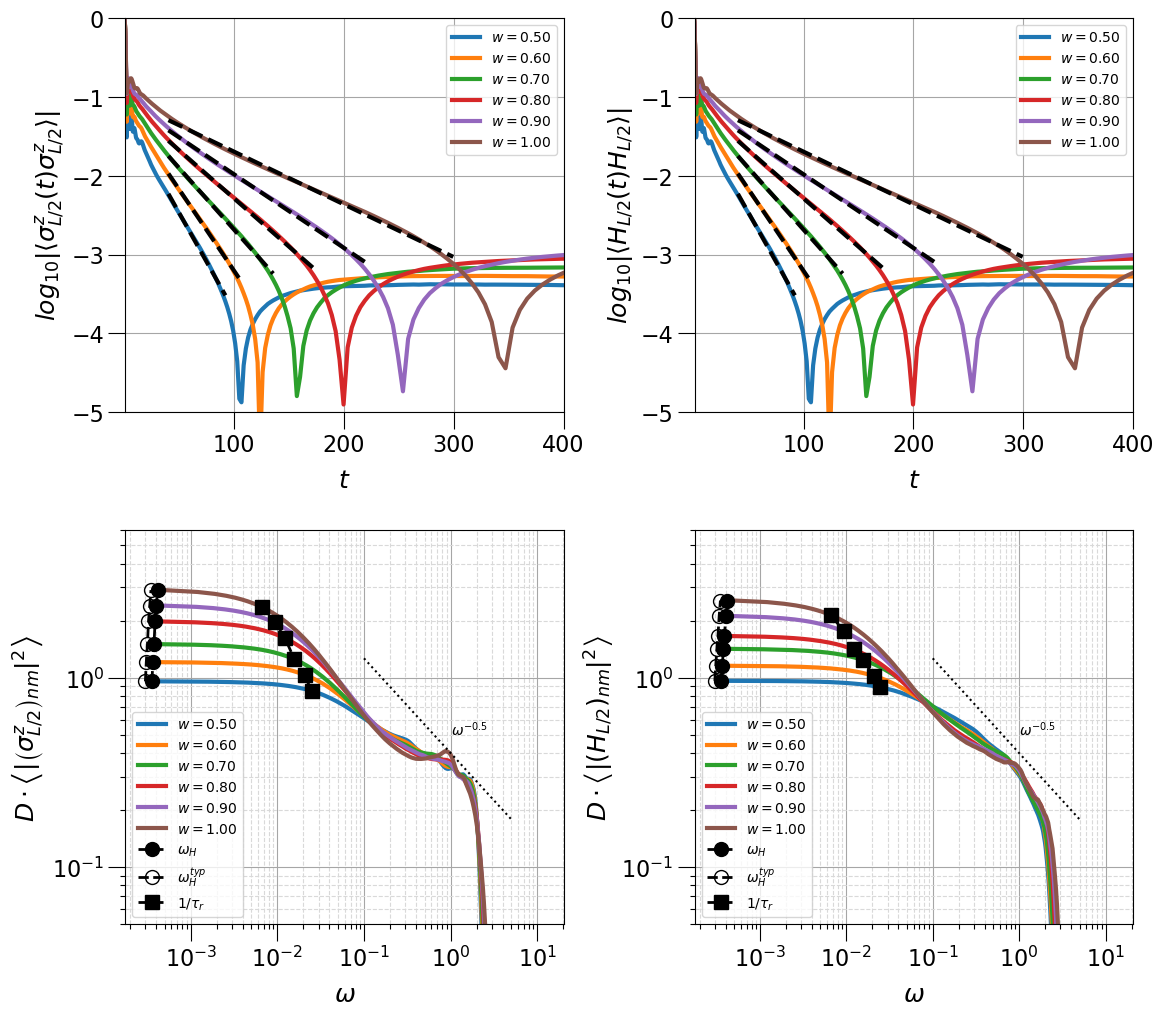

In [352]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots( nrows=2, ncols=2, figsize=(13,12), dpi = 100)

fig.subplots_adjust(wspace=0.3, hspace=0.3)
set_class_fig3 = copy.deepcopy(cf.plot_settings)
set_class_fig3.set_vs('x')
set_class_fig3.set_scaling('w')
settings = getattr(set_class_fig3, 'settings')

vals = hfun.get_scaling_array(settings=settings, 
                                    x0=0.5, 
                                    xend=1.02, 
                                    dx=0.1)

plot_fig3(axis_time=ax1, axis_spec=ax3, _operator=0, vals=vals, settings=settings)
plot_fig3(axis_time=ax2, axis_spec=ax4, _operator=2, vals=vals, settings=settings)

### $w=0.7=const$

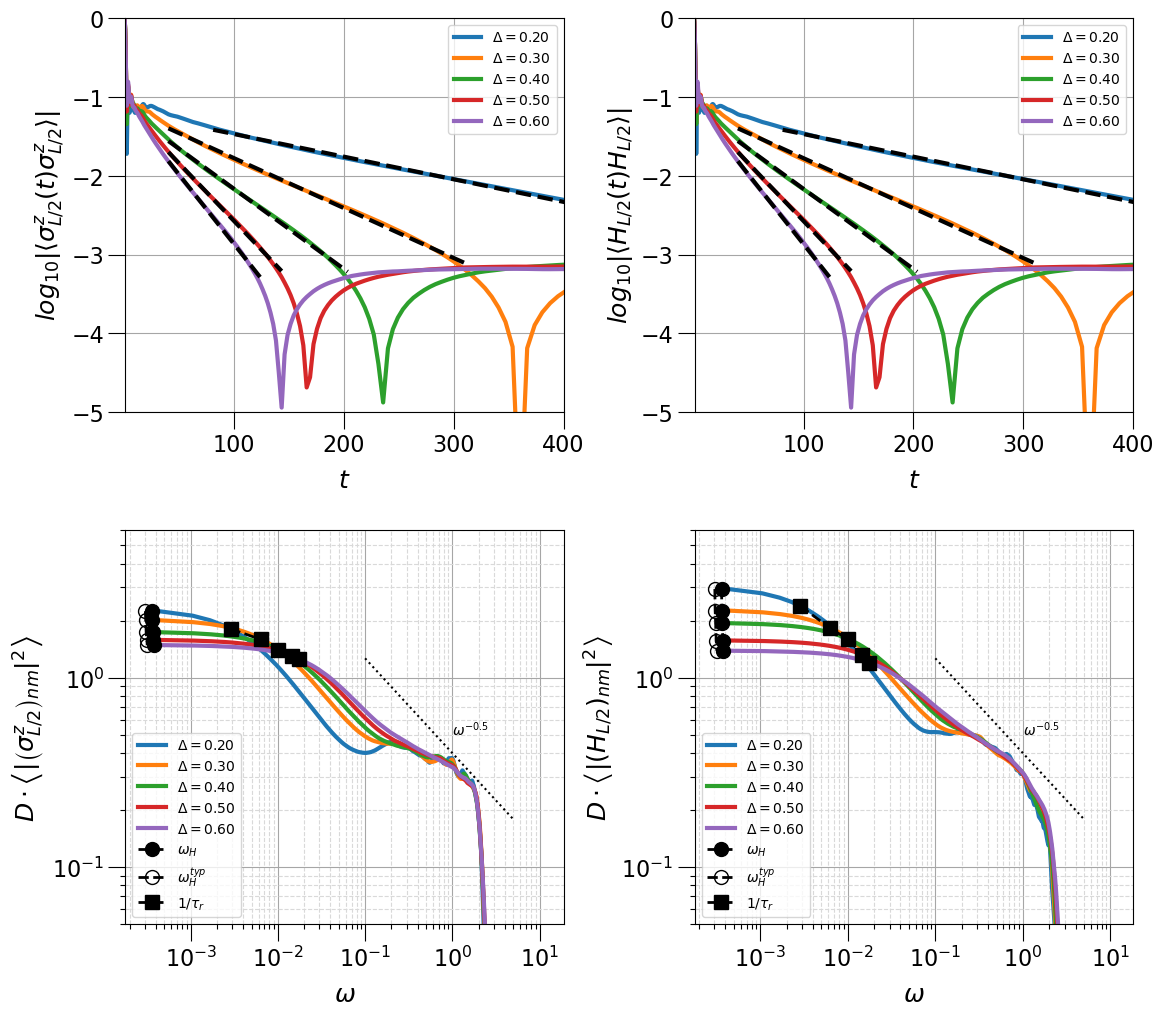

In [353]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots( nrows=2, ncols=2, figsize=(13,12), dpi = 100)

fig.subplots_adjust(wspace=0.3, hspace=0.3)
set_class_fig3 = copy.deepcopy(cf.plot_settings)
set_class_fig3.set_vs('x')
set_class_fig3.set_scaling('g')
settings = getattr(set_class_fig3, 'settings')

vals = hfun.get_scaling_array(settings=settings, 
                                    x0=0.2, 
                                    xend=0.62, 
                                    dx=0.1)

plot_fig3(axis_time=ax1, axis_spec=ax3, _operator=0, vals=vals, settings=settings)
plot_fig3(axis_time=ax2, axis_spec=ax4, _operator=2, vals=vals, settings=settings)

## FIGURE 5 --  RELAXATION TIMES

[12 14 16 18]
[12 14 16 18]
[12 14 16 18]
[12 14 16 18]
[12 14 16 18]
[12 14 16 18]


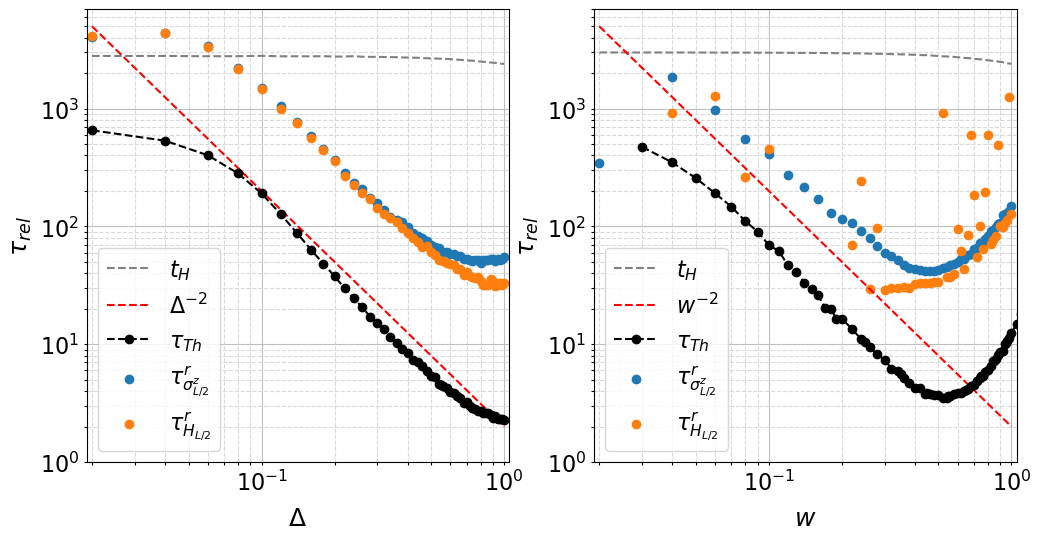

In [354]:
importlib.reload(spec_fun)
fig, (axis1, axis2) = plt.subplots(nrows=1,ncols=2,figsize=(12,6), dpi = 100)

vals = np.linspace(0.02, 1.00, 50)
set_class_fig5a = copy.deepcopy(cf.plot_settings)
set_class_fig5a.set_vs('L')
set_class_fig5a.set_scaling('g')

set_class_fig5b = copy.deepcopy(set_class_fig5a)
set_class_fig5b.set_scaling('w')

def plot_relax_time(axis, new_set_class, vals, _operator1, _operator2):
    if new_set_class is None:
        new_set_class = cf.plot_settings
    settings = getattr(new_set_class, 'settings')
    status_time, taus, tau_r1, tau_r_fit1, tH, tH_typ, gap_ratio = spec_fun.get_relax_times(vals=vals, set_class=new_set_class, operator=_operator1)
    status_time, taus, tau_r2, tau_r_fit2, tH, tH_typ, gap_ratio = spec_fun.get_relax_times(vals=vals, set_class=new_set_class, operator=_operator2)

    ii = settings['scaling_idx']
    xlab = "q/\\pi" if ii == 5 else (hfun.var_name if ii == 2 else settings['scaling'])

    def name(_operator): 
        return "\\sigma^z_{L/2}" if _operator == 0 else "H_{L/2}"
    axis.scatter(vals, tau_r_fit1, marker='o', label=r"$\tau^r_{%s}$"%name(_operator1))
    axis.scatter(vals, tau_r_fit2, marker='o', label=r"$\tau^r_{%s}$"%name(_operator2))
    axis.plot(vals, tH, linestyle='--', label=r"$t_H$", color='gray')
    #axis.plot(vals, tH_typ, linestyle=':', label=r"$t_H^{typ}$", color='gray')

    axis.plot(vals, 2e0 / vals**2, linestyle='--', color='red', label=r"$%s^{-2}$"%xlab)
    #axis.plot(vals, 1e0 / vals**1., linestyle='--', color='black', label=r"$%s^{-1}$"%xlab)

    set_class_th = copy.deepcopy(new_set_class)
    set_class_th.set_vs(settings['scaling'])
    set_class_th.set_scaling('L')
    try :
        tau_data = thouless.load(getattr(set_class_th, 'settings'))
        status_time = True
    except OSError:
        status_time = False
        print("No Thouless data present")
    if status_time == False or cf.model == 2: print('No data')
    else:
        idx = list(tau_data[0]).index(cf.L) 
        axis.plot(tau_data[1][idx], tau_data[2][idx], linestyle='--', color='black', marker='o', label=r"$\tau_{Th}$")

    spec_fun.set_inset_style(axis, vals, settings)
    axis.set_ylim(1, None)
    axis.legend(loc='lower left', ncol=1, fontsize=16)


plot_relax_time(axis=axis1, new_set_class=set_class_fig5a, vals=vals, _operator1=0, _operator2=2)
plot_relax_time(axis=axis2, new_set_class=set_class_fig5b, vals=vals, _operator1=0, _operator2=2)

## FIGURE 6-7 --  COLLAPSED DATA FOR BOTH CASES - CRITICAL POINTS

### COST FUNCTION MINIMZATION

In [355]:
import costfun.costfun as cost
def load_stats(settings = None, scaling_ansatz = None, crit_func = None):
    if settings is None: settings = user_settings
    #cost functinon
    if scaling_ansatz is None: scaling_ansatz='classic'
    if crit_fun is None: crit_fun='const'
    params = [0,0,0,0,0,0]
    x_max=None
    for x in xvals: 
        for _x_ in x: 
            if x_max is None or _x_ > x_max: x_max = _x_
    if settings['scaling_idx'] == 0:
        x_min = 0 if crit_fun == 'free' else -x_max
        bounds = [ (0.0, 5.0), (x_min, x_max)]
        num_of_param = 0
        if crit_fun == 'free': num_of_param = len(vals) - 1
        elif crit_fun == 'power_law': num_of_param = 3
        elif crit_fun == 'const': num_of_param = 0
        else: num_of_param = 3
        for i in range(num_of_param): bounds.append((x_min, x_max))
        params, cost_fun = cost.cost_func_minization(x=xvals, y=gap_ratio, sizes=vals, 
                                        scale_func=scaling_ansatz, 
                                        crit_func=crit_fun,
                                        bnds=bounds,
                                        population_size=1e2,
                                        maxiterarions=1e3, workers=10, realisations=1
                                    )
        print(scaling_ansatz + ": ", cost_fun)
    par = params[0]
    crit_pars = np.array(params[1:])
    rescale_fun = cost.resc_functions_dict[scaling_ansatz]
    critical_fun = cost.crit_functions_dict[crit_fun]

### GAP RATIO

### ENTROPY

# APPENDIX